# TFIDF Vectorization and Multinomial Naive Bayes Model

In [1]:
# Standard data science imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in X_train, X_test, y_train, y_test

X_train=pd.read_csv('../datasets/X_train.csv')['selftext']
X_test=pd.read_csv('../datasets/X_test.csv')['selftext']
y_train=pd.read_csv('../datasets/y_train.csv')['subreddit']
y_test=pd.read_csv('../datasets/y_test.csv')['subreddit']

In [3]:
# print to quick check on datasets

print(X_train.shape)
pd.DataFrame(X_train).head()

(1364,)


,selftext
0,one of our housekeeper is pretty known for bei...
1,i run a small hotel with a hand operated eleva...
2,tonight i had a couple of obviously homeless f...
3,i m not looking forward into going to work ton...
4,an earlier post today about a lady not underst...


In [4]:
print(X_test.shape)
pd.DataFrame(X_test).head()

(455,)


,selftext
0,my poor coworker who is black but an absolute ...
1,before i begin i want to point out that no one...
2,i ve been working at a restaurant for five yea...
3,mini rant the joy of mood swing at work just h...
4,another tale from the crazy night audit lady t...


In [5]:
print(y_train.shape)
pd.DataFrame(y_train).head()

(1364,)


,subreddit
0,1
1,1
2,1
3,0
4,1


In [6]:
print(y_test.shape)
pd.DataFrame(y_test).head()

(455,)


,subreddit
0,0
1,1
2,0
3,1
4,1


In [7]:
# Model imports

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


## TFIDF Vectorization and Multinomial Naive Bayes combined into a Pipeline

Running GridSearchCV and tuning the hyperparameters accordingly to optimize the model.

In [8]:
# setting my cv_var as 10

cv_var=10

In [9]:
# Instantiating pipeline for TFIDF Vectorization and Multinomial Naive Bayes

# TFIDF Vectorizer object will have token pattern = "[a-z]+[']?[a-z]*".
# It will allow words like 'I've' stay as they are.
# It will also remove pure numbers.
# 'english' stop_words removed.

pipe_tvec_mnb = Pipeline([
    ("tvec", TfidfVectorizer(token_pattern="[a-z]+[']?[a-z]*", lowercase=True, stop_words='english')),
    ("mnb", MultinomialNB())
    ])


In [10]:
pipe_params_tvec_mnb = {
    'tvec__max_features': [50, 100, 200],
    'tvec__min_df': [2, 3],
    'tvec__max_df': [.2, .25, .3],
    'tvec__ngram_range':[(1,1),(1,2)]
    
}




In [11]:
# Fitting and running GridSearchCV

gs_tvec_mnb = GridSearchCV(pipe_tvec_mnb, param_grid=pipe_params_tvec_mnb, cv=cv_var, n_jobs = -2, verbose=1)
gs_tvec_mnb.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-2)]: Done 360 out of 360 | elapsed:  1.3min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('tvec',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                         

In [12]:
print(gs_tvec_mnb.best_score_)
gs_tvec_mnb.best_params_

0.9303519061583577


{'tvec__max_df': 0.3,
 'tvec__max_features': 200,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 1)}

In [13]:
gs_tvec_mnb.score(X_train, y_train)

0.9362170087976539

In [14]:
gs_tvec_mnb.score(X_test, y_test)

0.9406593406593406

Further tune hyperparameters to achieve a better score:

In [15]:
pipe_params_tvec_mnb_final = {
    'tvec__max_features': [50, 250, 500],
    'tvec__min_df': [2, 3],
    'tvec__max_df': [.3, .5, .7],
    'tvec__ngram_range':[(1,1),(1,2)]
}

In [16]:
# Fitting and running GridSearchCV with revised parameters

gs_tvec_mnb_final = GridSearchCV(pipe_tvec_mnb, param_grid=pipe_params_tvec_mnb_final, cv=cv_var, n_jobs = -2 ,verbose=1)
gs_tvec_mnb_final.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-2)]: Done 360 out of 360 | elapsed:  1.3min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('tvec',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                         

In [17]:
print(gs_tvec_mnb_final.best_score_)
gs_tvec_mnb_final.best_params_

0.9574780058651027


{'tvec__max_df': 0.5,
 'tvec__max_features': 500,
 'tvec__min_df': 3,
 'tvec__ngram_range': (1, 2)}

In [18]:
print(f"Train Accuracy: {gs_tvec_mnb_final.score(X_train, y_train)}")

Train Accuracy: 0.9648093841642229


In [19]:
print(f"Test Accuracy: {gs_tvec_mnb_final.score(X_test, y_test)}")

Test Accuracy: 0.9648351648351648


## Predictions and Confusion Matrix

In [20]:
# Generate predictions

preds_tvec_mnb_final = gs_tvec_mnb_final.predict(X_test)

In [21]:
# Import the confusion matrix function.

from sklearn.metrics import confusion_matrix

In [22]:
# Generate a confusion matrix.

confusion_matrix(y_test, preds_tvec_mnb_final)

array([[231,   7],
       [  9, 208]], dtype=int64)

In [23]:
tn_tvec_mnb, fp_tvec_mnb, fn_tvec_mnb, tp_tvec_mnb = confusion_matrix(y_test, preds_tvec_mnb_final).ravel()

In [24]:
print("True Negatives: %s" % tn_tvec_mnb)
print("False Positives: %s" % fp_tvec_mnb)
print("False Negatives: %s" % fn_tvec_mnb)
print("True Positives: %s" % tp_tvec_mnb)

True Negatives: 231
False Positives: 7
False Negatives: 9
True Positives: 208


In [25]:
# Specificity of test set

spec_tvec_mnb = tn_tvec_mnb/(tn_tvec_mnb+fp_tvec_mnb)

print(f'Specificity: {round(spec_tvec_mnb,3)}')

Specificity: 0.971


In [26]:
# Sensitivity/Recall of test set

sens_tvec_mnb = tp_tvec_mnb/(tp_tvec_mnb+fn_tvec_mnb)

print(f'Sensitivity: {round(sens_tvec_mnb,3)}')

Sensitivity: 0.959


In [27]:
# Precision of test set

prec_tvec_mnb = tp_tvec_mnb/(tp_tvec_mnb+fp_tvec_mnb)

print(f'Precision: {round(prec_tvec_mnb,3)}')


Precision: 0.967


In [28]:
# F1 score of test set

f1_tvec_mnb = 2 * ((prec_tvec_mnb * sens_tvec_mnb)/(prec_tvec_mnb + sens_tvec_mnb))

print(f'F1: {round(f1_tvec_mnb,3)}')

F1: 0.963


## Relationship between Sensitivity and Specificity

In [29]:
# checking predictions based on X_test data, and optimised model
print(len(gs_tvec_mnb_final.predict(X_test)))
gs_tvec_mnb_final.predict(X_test)[0:5]

455


array([0, 1, 0, 1, 1], dtype=int64)

In [30]:
# checking predicted probabilities based on X_test data, and optimised model
print(len(gs_tvec_mnb_final.predict_proba(X_test)))
gs_tvec_mnb_final.predict_proba(X_test)[0:5]

455


array([[0.79866726, 0.20133274],
       [0.07949294, 0.92050706],
       [0.9282001 , 0.0717999 ],
       [0.16451001, 0.83548999],
       [0.01624924, 0.98375076]])

In [31]:
# Creating a dataframe called pred_df that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on our model.

pred_proba = [i[1] for i in gs_tvec_mnb_final.predict_proba(X_test)]

pred_df = pd.DataFrame({'true_values': y_test,'pred_probs':pred_proba})

print(pred_df.shape)
pred_df.head()

(455, 2)


,true_values,pred_probs
0,0,0.201333
1,1,0.920507
2,0,0.071800
3,1,0.835490
4,1,0.983751


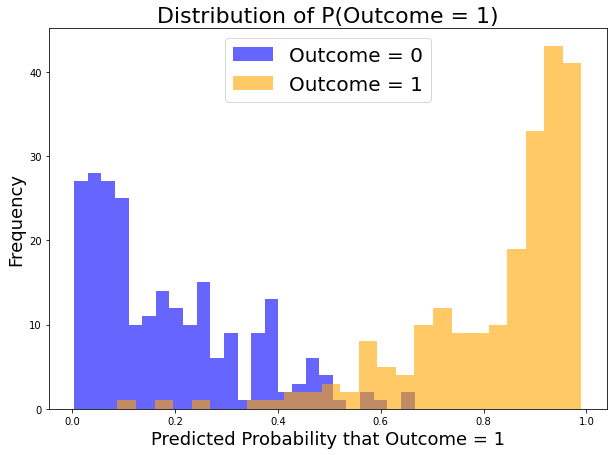

In [32]:
# Create figure.
plt.figure(figsize = (10,7))

# Create two histograms of observations.
plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins=25,
         color='b',
         alpha = 0.6,
         label='Outcome = 0')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins=25,
         color='orange',
         alpha = 0.6,
         label='Outcome = 1')

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)

# Create legend.
plt.legend(fontsize=20, loc='upper center');

## Receiver Operating Characteristic (ROC) Curve

The Receiver Operating Characteristic curve is a way to visualize the overlap between our positive class and negative class by moving our classification threshold from 0 to 1.


## ROC Area Under Curve (AOC)

The more area under this blue curve is, the better separated our distributions are.


We use the **area under the ROC curve** (abbreviated **ROC AUC** or **AUC ROC**) to quantify the gap between our distributions.


In [33]:
# Import roc_auc_score.
from sklearn.metrics import roc_auc_score

In [34]:
# Calculate score.
roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])

0.9899120938698059

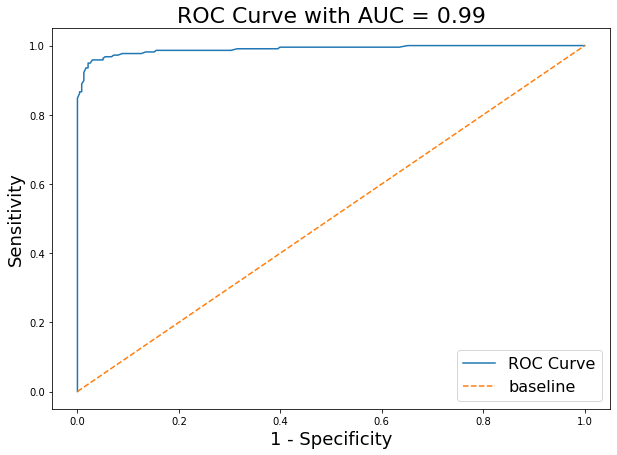

In [35]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    
# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f"ROC Curve with AUC = {round(roc_auc_score(pred_df['true_values'], pred_df['pred_probs']),3)}", fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

## Coefficients

In [36]:
# Restating best parameters obtained through GridSearchCV
gs_tvec_mnb_final.best_params_

{'tvec__max_df': 0.5,
 'tvec__max_features': 500,
 'tvec__min_df': 3,
 'tvec__ngram_range': (1, 2)}

In [37]:
# Instantiate TFIDF Vectorizer based on best parameters, fitting and transforming 

tvec_mnb_opt_vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.5, max_features = 500, min_df = 3, ngram_range = (1, 2))

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.

X_train_tvec_mnb_opt = tvec_mnb_opt_vectorizer.fit_transform(X_train)

X_test_tvec_mnb_opt = tvec_mnb_opt_vectorizer.transform(X_test)

# Converting to array.
X_train_tvec_mnb_opt= X_train_tvec_mnb_opt.toarray()




In [38]:
# Fit Multinomial model to TFIDF Vectorizer processed training data.

tvec_mnb_opt = MultinomialNB()

tvec_mnb_opt.fit(X_train_tvec_mnb_opt, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [39]:
# extracting optimum coefs of tvec_mnb model against feature variables,
# with exponentiated coeff rounded to 3 dec places:

tvec_mnb_opt_coefs = pd.DataFrame({'variable':tvec_mnb_opt_vectorizer.get_feature_names(),
                                      'coef':tvec_mnb_opt.coef_.T.ravel(),
                                      'abs_coef':np.abs(tvec_mnb_opt.coef_.T.ravel()),
                                        })

tvec_mnb_opt_coefs.sort_values('coef', inplace=True, ascending=False)


# reseting index, shows clear selection of top 10 and bottom 10 for next lines of code
tvec_mnb_opt_coefs.reset_index(drop=True,inplace=True)


# combining top 10 largest co-ef variables with bottom 10 co-ef variables
tvec_mnb_opt_coefs_top_btm_10 = pd.concat([tvec_mnb_opt_coefs.nlargest(10, 'coef'),tvec_mnb_opt_coefs.nsmallest(10, 'coef')[::-1]])
tvec_mnb_opt_coefs_top_btm_10

,variable,coef,abs_coef
0,room,-3.962984,3.962984
1,guest,-4.439592,4.439592
2,hotel,-4.462821,4.462821
3,desk,-4.834276,4.834276
4,night,-4.917337,4.917337
5,come,-5.113568,5.113568
6,check,-5.135868,5.135868
7,don,-5.138400,5.138400
8,day,-5.141709,5.141709
9,know,-5.142496,5.142496


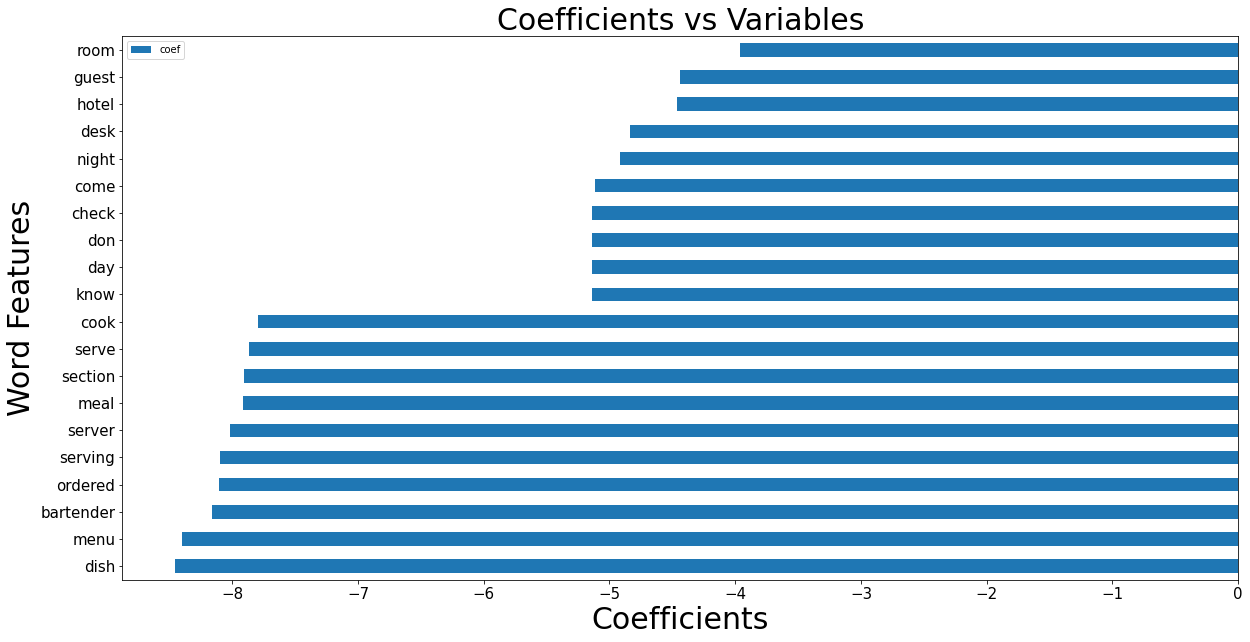

In [40]:
#plotting top 10 and bottom 10 coefs sorted in descending order to visualize the correlation of word features with the target class 1 - TalesFromYourServer
ax = tvec_mnb_opt_coefs_top_btm_10.sort_values('coef', ascending=True)[['variable','coef']].plot.barh('variable',figsize=(20,10))
ax.set_title("Coefficients vs Variables", fontsize=30)
ax.set_xlabel("Coefficients", fontsize=30)
ax.set_ylabel("Word Features", fontsize=30)
plt.xticks(size=15)
plt.yticks(size=15);

Interpreting coefficients:

All coefficients are negative. The least negative coefficients are the ones whom variables exert the most postive influence on prediction of target as Class 1, TalesFromTheFrontDesk.

## TFIDF Vectorization and Logsitic Regression Corpus Word Weightage

In [41]:
# converting X_train_tvec_mnb_opt into DataFrame
X_train_tvec_mnb_opt_df=pd.DataFrame(X_train_tvec_mnb_opt, columns = tvec_mnb_opt_vectorizer.get_feature_names())

In [42]:
X_train_tvec_mnb_opt_df

,able,absolutely,actually,agent,ago,allowed,amp,answer,anyways,apologize,...,worst,worth,wouldn,wrong,yeah,year,yelling,yes,yesterday,young
0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.23699,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,...,0.0,0.000000,0.000000,0.0,0.170839,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.182982,0.0,0.00000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.069526,0.040661,0.031611,0.0,0.061845,0.083173,0.000000,0.0,0.00000,0.0,...,0.0,0.000000,0.000000,0.0,0.037595,0.025391,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,...,0.0,0.000000,0.038786,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,...,0.0,0.293743,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1360,0.000000,0.000000,0.000000,0.0,0.081500,0.000000,0.000000,0.0,0.00000,0.0,...,0.0,0.000000,0.000000,0.0,0.099088,0.000000,0.0,0.0,0.0,0.0
1361,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1362,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [43]:
# find out weightage of each word appearing in the corpus by creating a 'Total' row at the end of the dataframe:
X_train_tvec_mnb_opt_df.loc['Total',:]= X_train_tvec_mnb_opt_df.sum(axis=0)
X_train_tvec_mnb_opt_df.loc['Total',:].sort_values(ascending=False)

room           91.068977
table          65.399025
guest          63.448312
don            54.962786
hotel          54.235208
                 ...    
housekeeper     6.373431
standard        6.266748
contact         6.203508
screaming       6.104760
mother          5.412440
Name: Total, Length: 500, dtype: float64

In [44]:
X_train_total_tvec_mnb_opt = pd.DataFrame(X_train_tvec_mnb_opt_df.loc['Total',:].sort_values(ascending=False))
print(X_train_total_tvec_mnb_opt.shape)
X_train_total_tvec_mnb_opt.head()

(500, 1)


,Total
room,91.068977
table,65.399025
guest,63.448312
don,54.962786
hotel,54.235208


In [45]:
# No. of modelled words fulfilling various weightage thresholds:

print(len(X_train_total_tvec_mnb_opt.loc[X_train_total_tvec_mnb_opt['Total'] <= 2]))
print(len(X_train_total_tvec_mnb_opt.loc[X_train_total_tvec_mnb_opt['Total'] <= 10]))
print(len(X_train_total_tvec_mnb_opt.loc[X_train_total_tvec_mnb_opt['Total'] <= 25]))
print(len(X_train_total_tvec_mnb_opt.loc[X_train_total_tvec_mnb_opt['Total'] <= 50]))


0
170
430
490


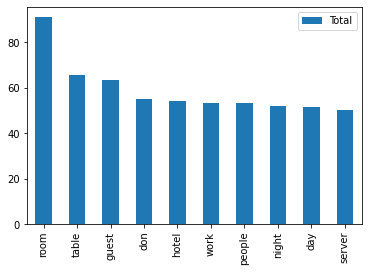

In [46]:
# plot histogram to observe the distribution

X_train_total_tvec_mnb_opt[X_train_total_tvec_mnb_opt.Total > 50].plot(kind='bar');

## TFIDF Vectorization and Logistic Regression Wordcloud Visualization

In [47]:
# Import Wordcloud 

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.feature_extraction import stop_words


In [48]:
# This wordcloud shows the relative influence of remaining features/words
# in training data left after cleaning and stopword removal, leading to Class 1, TalesFromTheFrontDesk prediction.
# stopwords keyword will remove 'english' stopwords

def wordcloud_gen_func(wordcloud_string):
    
    stopwords = set(stop_words.ENGLISH_STOP_WORDS)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white",
                          contour_width=5, contour_color='firebrick', collocations=False).generate(wordcloud_string)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


In [49]:
# instantiating wordcloud_string for visualisation

# converting float in Xtvec_mnb_opt_coefs['abs_coef'] to int for usage to form wordcloud_string:
tvec_mnb_opt_coefs['abs_coef']=tvec_mnb_opt_coefs['abs_coef'].apply(lambda i: int(i))

# forming wordcloud_string based on scalar-treated coefficients of tvec_mnb_opt_coefs

tvec_mnb_coef_wordcloud_string = ''
i = 0

# while loop to keep adding each word with a blank space after it, multiplied a scalar and divided by its coef:
while i < len(tvec_mnb_opt_coefs['variable']):
    tvec_mnb_coef_wordcloud_string += ((tvec_mnb_opt_coefs['variable'][i]+' ')*(int(100/(tvec_mnb_opt_coefs['abs_coef'][i]))))
    i += 1

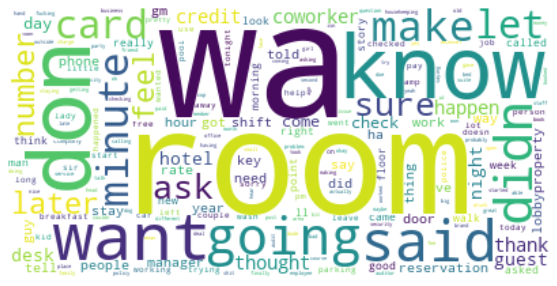

In [50]:
# This is the TFIDF Vectorization and Multinomial Naive Bayes WordCloud on tvec_mnb_opt_coefs:
wordcloud_gen_func(tvec_mnb_coef_wordcloud_string)